**Business and problem statement**

The taxicabs of New York City are widely recognized icons of the city and come in two varieties: yellow and green. Taxis painted canary yellow (medallion taxis) are able to pick up passengers anywhere in the five boroughs. Those painted apple green (street hail livery vehicles, commonly known as “boro taxis”), which began to appear in August 2013, are allowed to pick up passengers in Upper Manhattan, the Bronx, Brooklyn, Queens (excluding LaGuardia Airport and John F. Kennedy International Airport), and Staten Island. Both types have the same fare structure. Taxicabs are operated by private companies and licensed by the New York City Taxi and Limousine Commission (TLC).

They have Provided Green taxi past rides/trips data and asked us to design a machine learning model to predict the expected tip amount for a trip.

![](http://media.bizj.us/view/img/10216260/img0011*1200xx2592-1458-0-239.jpg)

**Model Selection**

As target varible(tip amount) is a continous numeric,so would choose Regression models and will verify all linear regression assumption, will do parameter tuning and finalize the best model.

**Evaluation Metric**

The evaluation metric for this project is Root Mean Square Error(RMSE).I have choosen RMSE as model evaluation metric beause even small amount of error in predicting tips will impact on the taxi rides(I want to penalize small error).

**Data Sources**

https://data.cityofnewyork.us/browse?q=2017%20GYC%20Green%20Taxi%20Data&sortBy=relevance

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**Data Dictionary**

URL : https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf

| **Variable**  | **Definition** |
| --- | --- |
| VendorID | A code indicating the LPEP provider that provided the record. |
| lpep_pickup_datetime |  The date and time when the meter was engaged. |
| lpep_dropoff_datetime | The date and time when the meter was disengaged. |
| store_and_fwd_flag |  This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward," because the vehicle did not have a connection to the server.Y= store and forward trip, N= not a store and forward trip|
| RatecodeID | The final rate code in effect at the end of the trip. 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride|
| PULocationID | Pick up Location ID. |
| DOLocationID | Drop Location ID. |
| Passenger_count | The number of passengers in the vehicle. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| fare_amount | The time-and-distance fare calculated by the meter. |
| extra | Miscellaneous extras and surcharges. Currently, this only includes the "$0.50" and "$1" rush hour and overnight charges |
| mta_tax | "$0.50" MTA tax that is automatically triggered based on the metered rate in use. |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
| payment_type | A numeric code signifying how the passenger paid for the trip. 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip |
| trip_type | A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.1= Street-hail, 2= Dispatch |
| tip_amount | This field is automatically populated for credit card tips. Cash tips are not included. |
| tolls_amount | Total amount of all tolls paid in trip. |
| ehail_fee | NA.|
| improvement_surcharge | surcharge assessed on hailed trips at the flag drop. |


In [45]:
# Import necessary Libraries.

import pandas as pd # Pandas Library (will use to load data,create data frame,perform operation on data frame...etc).
import numpy as np # Numpy Library ( will use to convert data frame to array or creating array etc...).
from sklearn.model_selection import train_test_split # For splitting data into train and validation using stratified sampling technique.
import seaborn as sns # For visualization (bar,box,hist,reg plot...etc)
import matplotlib.pyplot as plt # For visualization(bar,box,hist,scatter plot...etc)
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor # For checking multi collinearity using VIF.
from sklearn.linear_model import LinearRegression # For bulding linear regression model.
from sklearn.metrics import mean_squared_error # For calculating mean squred error.
from sklearn.metrics import r2_score # For calculating R^2 value.
from math import sqrt # For square root.
from statsmodels.api import OLS # For bulding stats linear model.
from sklearn.tree import DecisionTreeRegressor # For bulding Decision tree regressor model.
from sklearn.ensemble import RandomForestRegressor # For bulding Random Forest regressor model.
from xgboost.sklearn import XGBRegressor # For bulding XGB regressor model.
from sklearn.model_selection import RandomizedSearchCV # For parameter tuning.
import warnings # Igonre warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the training data csv file into environment using pandas library.
train_data = pd.read_csv('green_tripdata_2017-01.csv',sep=',',header='infer')

## Data Analysis,processing and Feature extraction

In [436]:
# Check the dimesnions of the data.
train_data.shape

(1070261, 19)

We can observe that total 1070261 records and 19 columns are there.

In [434]:
# Check first 2 records of data.
train_data.head(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.0,0.0,NaN,0.3,9.8,2,1
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.0,0.0,NaN,0.3,7.8,2,1


In [435]:
# Check last 2 records of data.
train_data.tail(2)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
1070259,1,2017-01-31 23:00:15,2017-01-31 23:10:07,N,1,82,56,1,2.2,9.0,0.5,0.5,0.0,0.0,NaN,0.3,10.3,2,1
1070260,1,2017-01-31 23:00:12,2017-01-31 23:04:19,N,1,244,244,1,0.7,5.0,0.5,0.5,1.0,0.0,NaN,0.3,7.3,1,1


In [437]:
# Check the summary statistics of data.
train_data.describe(include='all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
count,1.070261e+06,1070261,1070261,1070261,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06,0.0,1.070261e+06,1.070261e+06,1.070261e+06,1.070261e+06
unique,NaN,841291,839994,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-01-20 11:08:51,2017-01-22 00:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13,73,1068557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.797405e+00,NaN,NaN,NaN,1.082449e+00,1.128301e+02,1.294031e+02,1.368466e+00,2.569722e+00,1.124045e+01,3.580299e-01,4.874320e-01,1.128146e+00,8.353562e-02,NaN,2.926563e-01,1.363106e+01,1.515022e+00,1.019613e+00
std,4.019337e-01,NaN,NaN,NaN,5.673984e-01,7.667581e+01,7.763162e+01,1.046600e+00,2.718506e+00,8.903342e+00,3.876918e-01,8.456737e-02,2.043760e+00,7.444885e-01,NaN,5.024514e-02,1.015461e+01,5.244973e-01,1.386662e-01
min,1.000000e+00,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.800000e+02,-4.500000e+00,-5.000000e-01,-1.010000e+02,-1.108000e+01,NaN,-3.000000e-01,-1.800000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,4.900000e+01,6.100000e+01,1.000000e+00,9.700000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.670000e+00,8.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.056000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,NaN,NaN,NaN,1.000000e+00,1.730000e+02,1.930000e+02,1.000000e+00,3.170000e+00,1.350000e+01,5.000000e-01,5.000000e-01,1.890000e+00,0.000000e+00,NaN,3.000000e-01,1.630000e+01,2.000000e+00,1.000000e+00


We can observe that passenger_count 0,trip_distance 0,fare_amount negative values,tip_amount negative values,
ehail_fee all null values,total amount negative values.We will handle these things as part of preprocessing steps.

In [438]:
# Below function returns column datatypes, unique values, null values,unique values count for the given data.
def statsSummary(df):
    return pd.DataFrame({
        'Data types':df.dtypes,
        'Unique Leveles':[df[col].unique() for col in df.columns],
        'Null Values':df.isna().sum(),
        'Unique Values Count': df.nunique()
        })

In [439]:
# Check column data types, unique values, null values,unique values count for trainn data
statsSummary(train_data)

,Data types,Unique Leveles,Null Values,Unique Values Count
VendorID,int64,"[2, 1]",0,2
lpep_pickup_datetime,object,"[2017-01-01 00:01:15, 2017-01-01 00:03:34, 201...",0,841291
lpep_dropoff_datetime,object,"[2017-01-01 00:11:05, 2017-01-01 00:09:00, 201...",0,839994
store_and_fwd_flag,object,"[N, Y]",0,2
RatecodeID,int64,"[1, 5, 4, 2, 3, 6, 99]",0,7
PULocationID,int64,"[42, 75, 82, 255, 166, 179, 74, 112, 36, 127, ...",0,251
DOLocationID,int64,"[166, 74, 70, 232, 239, 226, 167, 37, 174, 238...",0,257
passenger_count,int64,"[1, 5, 2, 3, 6, 4, 0, 7, 8, 9]",0,10
trip_distance,float64,"[1.71, 1.44, 3.45, 2.11, 2.76, 4.14, 4.22, 2.8...",0,2872
fare_amount,float64,"[9.0, 6.5, 12.0, 10.5, 11.5, 15.0, 19.0, 11.0,...",0,717


In [5]:
# Dropping Ehail_fee column as it is having only NA values.
def dropNAColumn(df):
    df.drop(labels=['ehail_fee'],axis=1,inplace=True)

In [6]:
# Drop ehail_fee column from train data.
dropNAColumn(train_data)

In [579]:
# Check the columns name list after dropping echail_fee column.
train_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type'],
      dtype='object')

In [7]:
# Function used to convert object type to date type.
def dateDataTypeConversion(df):
    for col in ['lpep_pickup_datetime','lpep_dropoff_datetime']:
        df[col]=pd.to_datetime(df[col])

In [8]:
# Convert date type for train data.
dateDataTypeConversion(train_data)

In [583]:
# Function cheks special characters in numeric columns for the given data.
def specialCharcterVerification_NumCol(data):
    for col in data.select_dtypes(['int64','float64']).columns: 
        print('\n',col,'----->')
        for index in range(1,len(data)):
            try:
                skip=float(data.loc[index,col])
                skip=int(data.loc[index,col])
            except ValueError :
                if(str(data.loc[index,col]) != 'nan'):
                    print(index,data.loc[index,col])

In [587]:
# Check speical charcters in numeric columns for train data.
specialCharcterVerification_NumCol(train_data)


 VendorID ----->

 RatecodeID ----->

 PULocationID ----->

 DOLocationID ----->

 passenger_count ----->

 trip_distance ----->

 fare_amount ----->

 extra ----->

 mta_tax ----->

 tip_amount ----->

 tolls_amount ----->

 improvement_surcharge ----->

 total_amount ----->

 payment_type ----->

 trip_type ----->


In [595]:
# Function cheks special characters in category columns for the given data.
def specialCharcterVerification_CatCol(data):
    for col in data.select_dtypes(['category','object']).columns:
        print('\n',col,'----->')
        for index in range(1,len(data)):
            if  str(data.loc[index,col]).isdigit() or str(data.loc[index,col]) =='nan' or data.loc[index,col].isalpha() or data.loc[index,col].isalnum():
                skip = True
            else:
                print("Index ",index,"\tSpecial Character ",data.loc[index,col]) 

In [596]:
# Check speical charcters in category columns for train data.
specialCharcterVerification_CatCol(train_data)


 store_and_fwd_flag ----->


In [9]:
# It calculates and returns trip duration(mins) value by using trip pickup and dropping time.
def tripDuration(df):
    df['trip_duration']=round(abs(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime'])/np.timedelta64(1,'m'),4)

In [10]:
# Get the trip duration for train data.
tripDuration(train_data)

In [622]:
# check the trip duration min value,if the duration is zero then it might be wrong entry because if the trip happen then it 
# would have some duration.
train_data['trip_duration'].min()

0.0

We can observe some of the  trip duration values are zero and also above we observed couple of numeric column values are negative (amount will not be negative),so let's remove those records from data(Outliers detection and removal).

In [11]:
# Function removes outliers.
def remove_zero_negative_records(df):
    df = df[((df['fare_amount']>0) & (df['total_amount']>0) &(df['trip_distance']>0)& (df['passenger_count']>0)
         & (df['trip_duration']>0))] 
    return df

In [624]:
# Check dimensionns of data before applying filter.
train_data.shape

(1070261, 19)

In [12]:
# Remove zero,negitve records from fare_amount,total_amount,trip_distance,passenger_count.
train_data = remove_zero_negative_records(train_data)

In [626]:
# Check dimensionns of data after applying filter.
train_data.shape

(1053094, 19)

In [13]:
# Function drops the duplicate records for the given data.
def drop_duplicate_records(df):
    df.drop_duplicates(inplace=True)

In [14]:
# Drop duplicate records from train data.
drop_duplicate_records(train_data)

In [15]:
# Function extracts pikup and dropping day,hour and drops pickup,dropoff datetime columns.
def dateFeatures(df):
    df['pickup_week_day'] = df.lpep_pickup_datetime.dt.weekday
    df['pickup_hour'] = df.lpep_pickup_datetime.dt.hour
    df['dropoff_week_day'] = df.lpep_dropoff_datetime.dt.weekday
    df['dropoff_hour'] = df.lpep_dropoff_datetime.dt.hour
    df.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis=1,inplace=True)

In [16]:
# Get the pickup,dropping day,hour for train data.
dateFeatures(train_data)

In [17]:
# Function bins the hours into different categories.
def time_of_day(hour):
    if hour in range(6,12):
        return 'Morning'
    elif hour in range(12,16):
        return 'Afternoon'
    elif hour in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [18]:
# Function returns pickup,dropoff hour category.
def hour_of_day(df):
    df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
    df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [19]:
# Get the hour category for pickup,dropoff hour for train data.
hour_of_day(train_data)

In [611]:
# Check the first record of data after adding new features.
train_data.head(1)

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,pickup_week_day,pickup_hour,dropoff_week_day,dropoff_hour,pickup_timeofday,dropoff_timeofday
0,2,N,1,42,166,1,1.71,9.0,0.0,0.5,...,9.8,2,1,9.8333,6,0,6,0,Late night,Late night


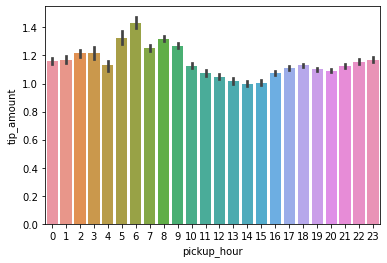

In [614]:
# we can observe pickup peak hours are between 5-8 hour.
sns.barplot(x='pickup_hour',y='tip_amount',data=train_data)

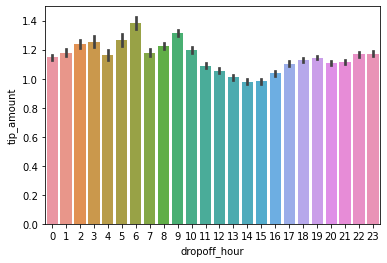

In [634]:
# we can observe dropoff_hour peak hours are at 6th,9th hour.
sns.barplot(x='dropoff_hour',y='tip_amount',data=train_data)

In [20]:
# Function returns peak hour indicator based on peak hours.
# I have picked the peaks hours based on above barplots and internet search result information.
def peakHour(df):
    df['pickup_peak_hour']=df['pickup_hour'].apply(lambda hour : '1' if hour>=5 and hour<=8 else '0')
    df['dropoff_peak_hour']=df['dropoff_hour'].apply(lambda hour : '1' if hour==6 or hour==9 else '0')
    df.drop(labels=['pickup_hour','dropoff_hour'],axis=1,inplace=True)

In [21]:
# Get the peak hour indicator.
peakHour(train_data)

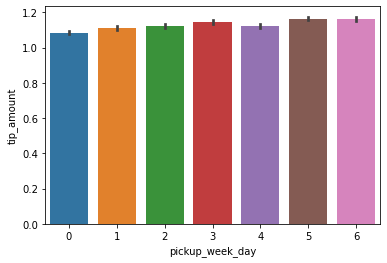

In [637]:
# We can observe that pickup weekdays are peaks on weekends,As most of them go out on weekend on various purpose.(Monday=0,sunday=6)
sns.barplot(x='pickup_week_day',y='tip_amount',data=train_data)

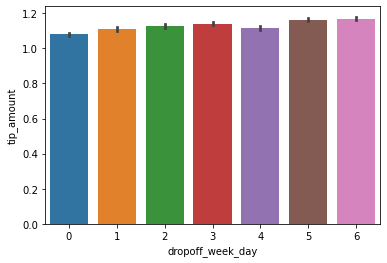

In [638]:
# We can observe that dropoff weekday are peaks on weekends,As most of them go out on weekend on various purpose.
sns.barplot(x='dropoff_week_day',y='tip_amount',data=train_data)

In [22]:
# Function returns peak day indicator based on peak day.
# I have picked the peaks day based on above barplots and internet search result information.
def peakDay(df):
    df['pickup_peak_day']=df['pickup_week_day'].apply(lambda day : '1' if day==5 or day==6 else '0')
    df['dropoff_peak_day']=df['dropoff_week_day'].apply(lambda day : '1' if day==5 or day==6 else '0')
    df.drop(labels=['pickup_week_day','dropoff_week_day'],axis=1,inplace=True)

In [23]:
# Get the peak day.
peakDay(train_data)

In [24]:
# Function converts category column data types.
def catDataTypeConversions(df):
    catCols = ['VendorID','store_and_fwd_flag','RatecodeID','payment_type','trip_type','pickup_timeofday','dropoff_timeofday',
          'pickup_peak_hour','dropoff_peak_hour','pickup_peak_day','dropoff_peak_day']
    for col in catCols:
        df[col]=df[col].astype('category')

In [25]:
# Convert category column data types for train data.
catDataTypeConversions(train_data)

In [643]:
# Check the columns data types after type conversion.
train_data.dtypes

VendorID                 category
store_and_fwd_flag       category
RatecodeID               category
PULocationID                int64
DOLocationID                int64
passenger_count             int64
trip_distance             float64
fare_amount               float64
extra                     float64
mta_tax                   float64
tip_amount                float64
tolls_amount              float64
improvement_surcharge     float64
total_amount              float64
payment_type             category
trip_type                category
trip_duration             float64
pickup_timeofday         category
dropoff_timeofday        category
pickup_peak_hour         category
dropoff_peak_hour        category
pickup_peak_day          category
dropoff_peak_day         category
dtype: object

In [646]:
# Function Calculate variance for each numeric column and return.
def variance(x):
        return(pd.DataFrame({'Datatype' : x.dtypes,
                            'Variance': [round(x[i].var(),5) for i in x] }))

In [647]:
# Get the varinace for each numeric column of train data.
variance(train_data.select_dtypes(['int64','float64']))

,Datatype,Variance
PULocationID,int64,5865.18831
DOLocationID,int64,6024.36358
passenger_count,int64,1.10003
trip_distance,float64,7.36094
fare_amount,float64,71.65931
extra,float64,0.14816
mta_tax,float64,0.00339
tip_amount,float64,3.86619
tolls_amount,float64,0.54754
improvement_surcharge,float64,0.00119


We can observe passenger_count,trip_distance,extra,mta_tax,tolls_amount,improvement_surcharge column data varince is very less.

In [651]:
# Fucntion display category column level count.
def cat_col_level_count(df):
    for col in df.select_dtypes(['category']).columns:
        print(df[col].value_counts())

In [652]:
# Get the category column level count for train data.
cat_col_level_count(train_data)

2    840774
1    212320
Name: VendorID, dtype: int64
N    1051485
Y       1609
Name: store_and_fwd_flag, dtype: int64
1    1036925
5      13527
2       1648
4        525
3        457
6         12
Name: RatecodeID, dtype: int64
2    524669
1    523538
3      3001
4      1851
5        35
Name: payment_type, dtype: int64
1    1039268
2      13826
Name: trip_type, dtype: int64
Evening       399597
Late night    246206
Morning       216736
Afternoon     190555
Name: pickup_timeofday, dtype: int64
Evening       402087
Late night    254997
Morning       210214
Afternoon     185796
Name: dropoff_timeofday, dtype: int64
0    953317
1     99777
Name: pickup_peak_hour, dtype: int64
0    994812
1     58282
Name: dropoff_peak_hour, dtype: int64
0    719468
1    333626
Name: pickup_peak_day, dtype: int64
0    719017
1    334077
Name: dropoff_peak_day, dtype: int64


In [653]:
# Fcuntion display missing percentage of NA values for the given data.
def missingValuesPercentage(df):
    missing_values = (df.isna().sum() /len(df)).round(4) * 100 
    print(missing_values.sort_values(ascending = False))

In [654]:
# Get the missing % of NA's for train data.
missingValuesPercentage(train_data)

dropoff_peak_day         0.0
tip_amount               0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tolls_amount             0.0
pickup_peak_day          0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
trip_duration            0.0
pickup_timeofday         0.0
dropoff_timeofday        0.0
pickup_peak_hour         0.0
dropoff_peak_hour        0.0
VendorID                 0.0
dtype: float64


## Exploratory Data Analysis ( EDA )

### Univariant Analysis

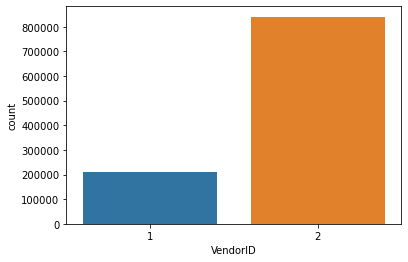

In [656]:
# Chceck the frequency count of VendorId.
sns.countplot(x='VendorID',data=train_data)

We can observe "VeriFone Inc" provided more records.

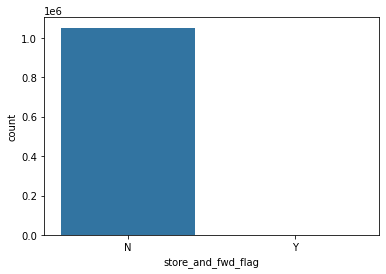

In [657]:
# Check the frequency count for store and fwd flag column.
sns.countplot(x='store_and_fwd_flag',data=train_data)

We can observe the trip record was not held in vehicle memory before sending to the vendor.
From above plot we are not abel to see Y value,so let's print count for each level.

In [659]:
# Display each count level for store_and_fwd_flag column.
train_data.store_and_fwd_flag.value_counts()

N    1051485
Y       1609
Name: store_and_fwd_flag, dtype: int64

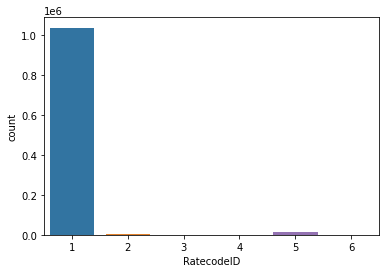

In [660]:
# Check the frequency count for RatecodeId column.
sns.countplot(x='RatecodeID',data=train_data)

We can observe most of the trip rate code was "Standard rate".
From above plot we are not abel to see all level count clearly,so let's print count for each level.

In [661]:
# Display each count level for RatecodeID column.
train_data.RatecodeID.value_counts()

1    1036925
5      13527
2       1648
4        525
3        457
6         12
Name: RatecodeID, dtype: int64

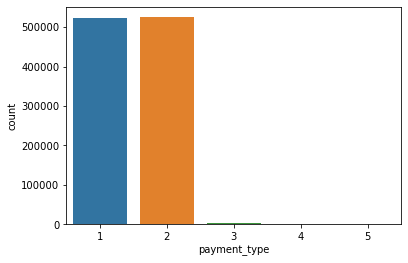

In [662]:
# Check the frequency count for payment_type column.
sns.countplot(x='payment_type',data=train_data)

We can observe most of the customer paid through either "Credit card" or "Cash".From above plot we are not abel to see all level count clearly,so let's print count for each level.

In [664]:
# Display each count level for payment_type column.
train_data.payment_type.value_counts()

2    524669
1    523538
3      3001
4      1851
5        35
Name: payment_type, dtype: int64

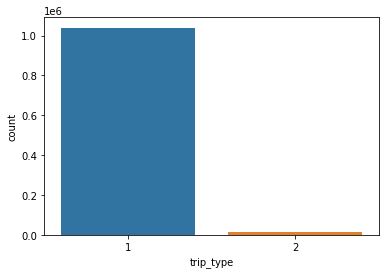

In [665]:
# Check the frequency count for trip_type column.
sns.countplot(x='trip_type',data=train_data)

We can observe most of the trip type are "Street-hail"

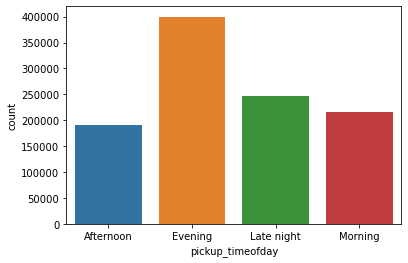

In [666]:
# Check the frequency count for pickup_timeofday column.
sns.countplot(x='pickup_timeofday',data=train_data)

We can observe most of the taxi booking is happening in the evening.

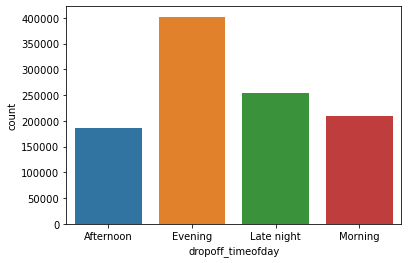

In [668]:
# Check the frequency count for dropoff_timeofday column.
sns.countplot(x='dropoff_timeofday',data=train_data)

We can observe most of the taxi dropping is happening in the evening.

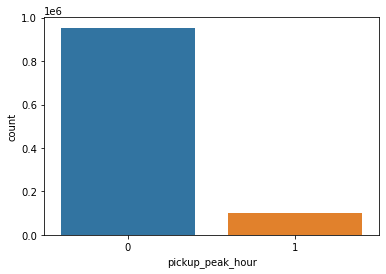

In [669]:
# Check the frequency count for pickup_peak_hour column.
sns.countplot(x='pickup_peak_hour',data=train_data)

Most of the data we have is non peak hour

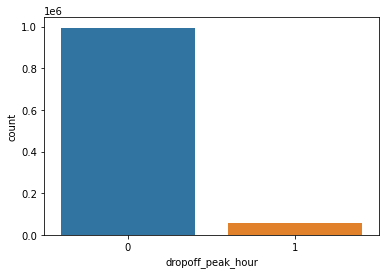

In [671]:
# Check the frequency count for dropoff_peak_hour column.
sns.countplot(x='dropoff_peak_hour',data=train_data)

Most of the data we have is non peak hour.

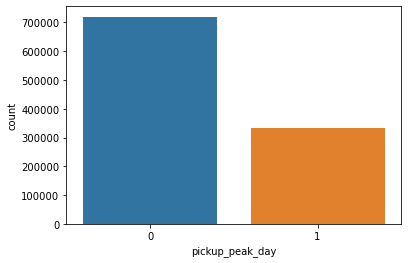

In [672]:
# Check the frequency count for pickup_peak_day column.
sns.countplot(x='pickup_peak_day',data=train_data)

Most of the data we have is non peak day.

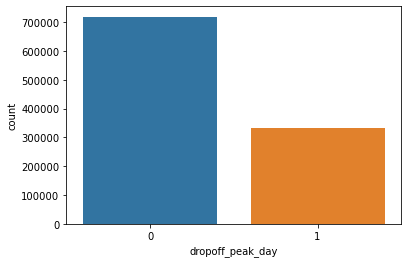

In [673]:
# Check the frequency count for dropoff_peak_day column.
sns.countplot(x='dropoff_peak_day',data=train_data)

Most of the data we have is non peak day.

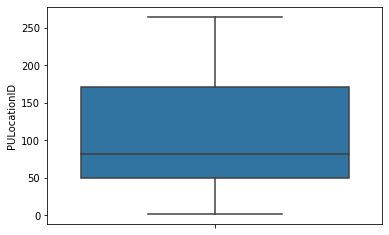

In [675]:
# Check the distribution of PULocationID.
sns.boxplot(y='PULocationID',data=train_data)

We can observe Median is near to first quratile.

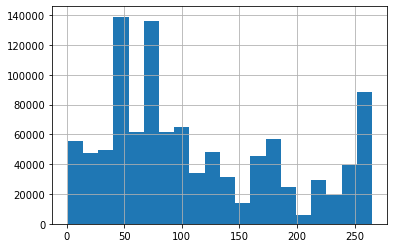

In [677]:
# Check the continous distribution of PULocationID.
train_data['PULocationID'].hist(bins=20)

We can observe most of the time the taxi is picking passengers from 45-100 location.

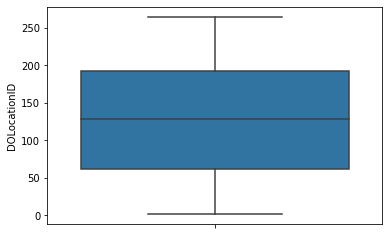

In [60]:
# Check the distribution of DOLocationID.
sns.boxplot(y='DOLocationID',data=train_data)

We can observe median value is at 50% quartile,so data is distributed acorss all the bins are almost equal.

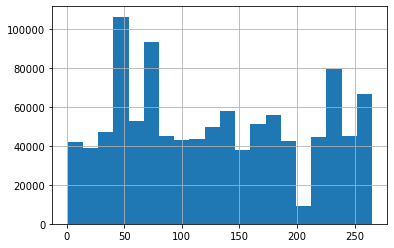

In [679]:
# Check the continous distribution of DOLocationID.
train_data['DOLocationID'].hist(bins=20)

We can observe most of the time the taxi is dropping passengers at 45-100 location.

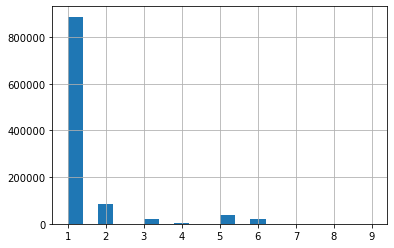

In [683]:
# Check the continous distribution of passenger_count.
train_data['passenger_count'].hist(bins=20)

We can observe most of the time single passenger is booking taxi.

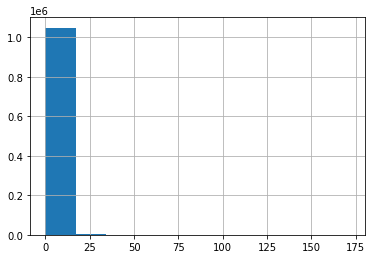

In [695]:
# Check the continous distribution of trip_distance.
train_data['trip_distance'].hist(bins=10)

We can observe most of the trips are happening between 1-20 miles.

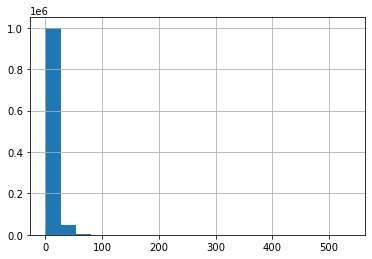

In [690]:
# Check the continous distribution of fare_amount.
train_data['fare_amount'].hist(bins=20)

We can observe most of the time the fare amount is 1.

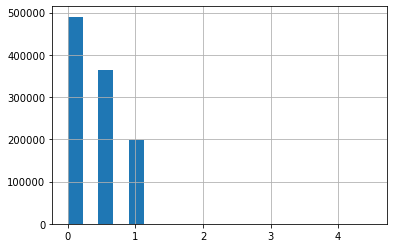

In [704]:
# Check the continous distribution of extra.
train_data['extra'].hist(bins=20)

We can observe the Miscellaneous extras and surcharges are between $0.5 to $1. 

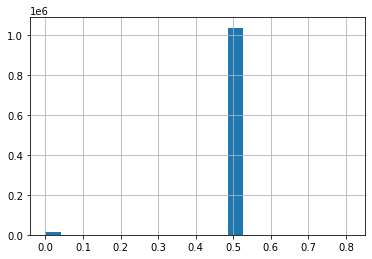

In [706]:
# Check the continous distribution of mta_tax.
train_data['mta_tax'].hist(bins=20)

We can observe most of the time mta_tax is 0.5$.

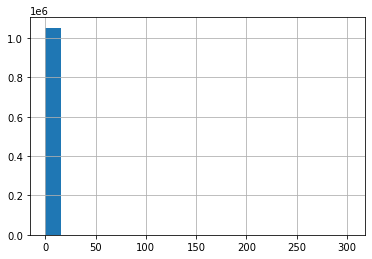

In [709]:
# Check the continous distribution of tip_amount.
train_data['tip_amount'].hist(bins=20)

We can observe most of the time people are giving tip between 0-10$ using credit card.

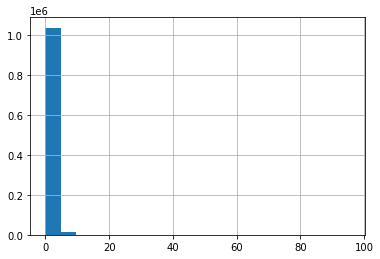

In [713]:
# Check the continous distribution of tolls_amount.
train_data['tolls_amount'].hist(bins=20)

We can observe most of the time toll amount paid during trip is between 0-5$

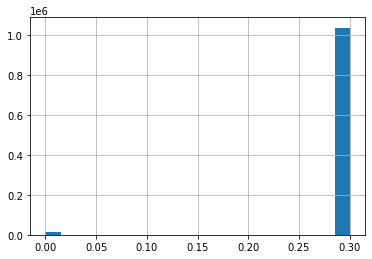

In [718]:
# Check the continous distribution of improvement_surcharge.
train_data['improvement_surcharge'].hist(bins=20)

We can observe most of the time $0.30 improvement surcharge assessed on hailed trips.

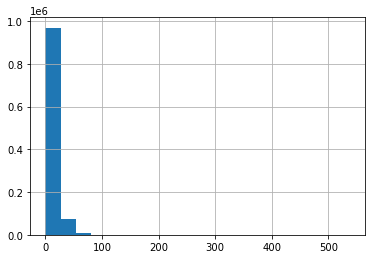

In [726]:
# Check the continous distribution of total_amount.
train_data['total_amount'].hist(bins=20)

We can observe most of the trip were charged between 1-20$

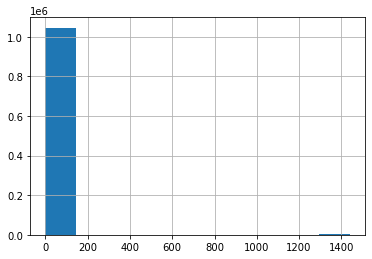

In [735]:
# Check the continous distribution of trip_duration.
train_data['trip_duration'].hist(bins=10)

We can observe most of the trips durtion is between 1-130 mins.

### Bivariant Analysis

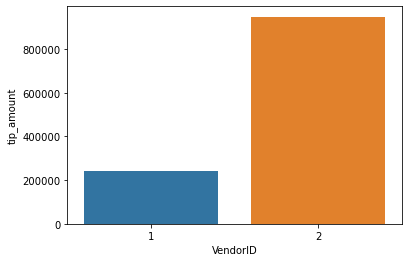

In [742]:
# We can check how tip amount with respect to VendorID.
sns.barplot(x='VendorID',y='tip_amount',data=train_data.groupby('VendorID').agg({'tip_amount':'sum'}).reset_index())

We can observe "VeriFone Inc." vendor is getting more tips.

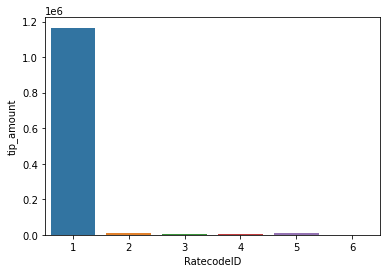

In [744]:
# We can check how tip amount with respect to RatecodeID.
sns.barplot(x='RatecodeID',y='tip_amount',data=train_data.groupby('RatecodeID').agg({'tip_amount':'sum'}).reset_index())

We can observe "Standard rate" rate code is getting more tips.

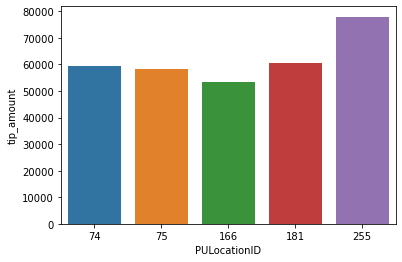

In [751]:
# We can check how tip amount with respect to PULocationID.
sns.barplot(x='PULocationID',y='tip_amount',data=train_data.groupby('PULocationID').agg({'tip_amount':'sum'}).reset_index().sort_values(by='tip_amount',ascending=False).head(5))

We can observe when taxi pickups from 255 location, most number of tips are getting.

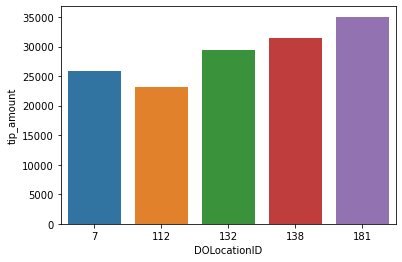

In [756]:
# We can check how tip amount with respect to DOLocationID.
sns.barplot(x='DOLocationID',y='tip_amount',data=train_data.groupby('DOLocationID').agg({'tip_amount':'sum'}).reset_index().sort_values(by='tip_amount',ascending=False).head(5))

We can observe when taxi drops at 181 location, most number of tips are getting.

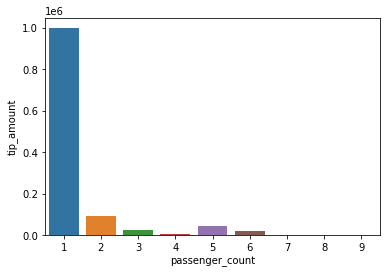

In [758]:
# We can check how tip amount with respect to passenger_count.
sns.barplot(x='passenger_count',y='tip_amount',data=train_data.groupby('passenger_count').agg({'tip_amount':'sum'}).reset_index())

We can observe we are getting more tips when single passenger books taxi.

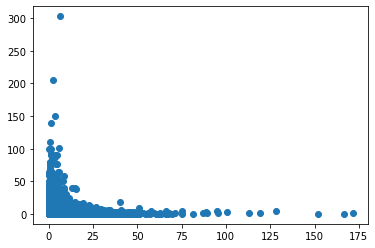

In [759]:
# Check the relationship between tip amount and trip distance.
plt.scatter(x='trip_distance',y='tip_amount',data=train_data)

We can observe for short ditance we are getting more tips.

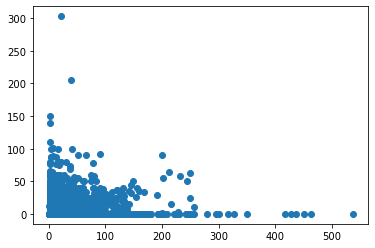

In [760]:
# Check the relationship between tip amount and fare_amount.
plt.scatter(x='fare_amount',y='tip_amount',data=train_data)

We can observe we are getting good tips when we have fare amount between 1-100

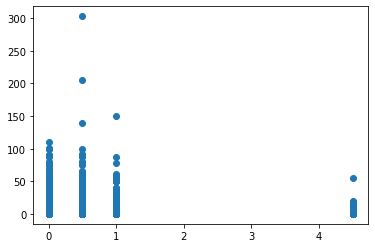

In [761]:
# Check the relationship between tip amount and extra.
plt.scatter(x='extra',y='tip_amount',data=train_data)

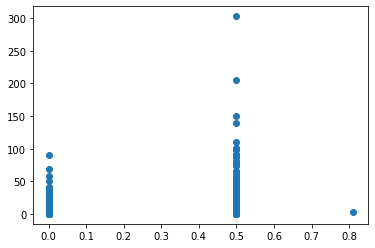

In [762]:
# Check the relationship between tip amount and mta_tax.
plt.scatter(x='mta_tax',y='tip_amount',data=train_data)

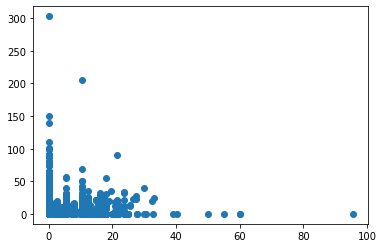

In [763]:
# Check the relationship between tip amount and tolls_amount.
plt.scatter(x='tolls_amount',y='tip_amount',data=train_data)

We can observe when the tolls amount is less we are getting good tips

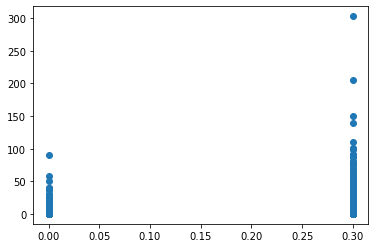

In [764]:
# Check the relationship between tip amount and improvement_surcharge.
plt.scatter(x='improvement_surcharge',y='tip_amount',data=train_data)

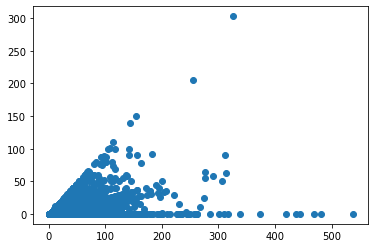

In [765]:
# Check the relationship between tip amount and total_amount.
plt.scatter(x='total_amount',y='tip_amount',data=train_data)

we are getting good tips when the total amount is high.

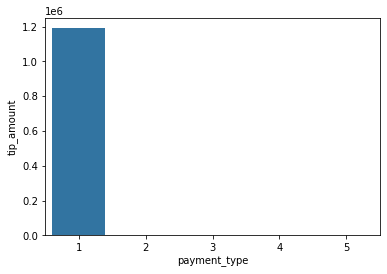

In [766]:
# We can check how tip amount with respect to payment_type.
sns.barplot(x='payment_type',y='tip_amount',data=train_data.groupby('payment_type').agg({'tip_amount':'sum'}).reset_index())

We are getting more tips when the customer pays trip money using Credit card.

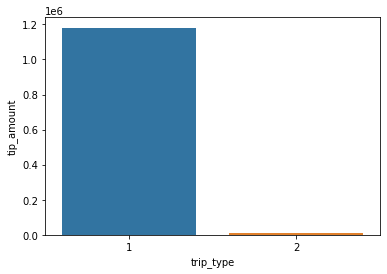

In [767]:
# We can check how tip amount with respect to trip_type.
sns.barplot(x='trip_type',y='tip_amount',data=train_data.groupby('trip_type').agg({'tip_amount':'sum'}).reset_index())

we are getting more trip when the trip is "Street-hail"

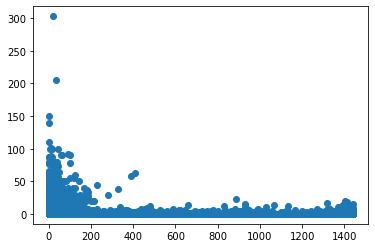

In [768]:
# Check the relationship between tip amount and trip_duration.
plt.scatter(x='trip_duration',y='tip_amount',data=train_data)

For short trip we are getting more tips.

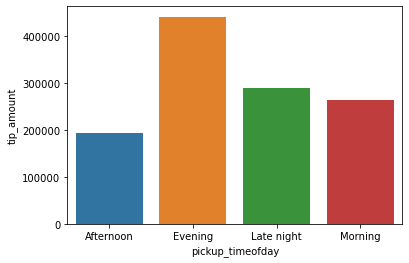

In [769]:
# We can check how tip amount with respect to pickup_timeofday.
sns.barplot(x='pickup_timeofday',y='tip_amount',data=train_data.groupby('pickup_timeofday').agg({'tip_amount':'sum'}).reset_index())

We are getting more tips for evening pickup trips.

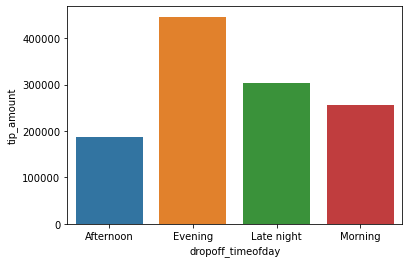

In [771]:
# We can check how tip amount with respect to dropoff_timeofday.
sns.barplot(x='dropoff_timeofday',y='tip_amount',data=train_data.groupby('dropoff_timeofday').agg({'tip_amount':'sum'}).reset_index())

We are getting more tips for evening drop trips.

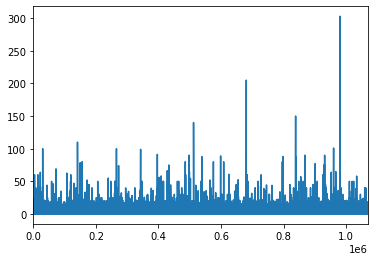

In [774]:
# Check the is there any trend,seasonality in the target varible.
train_data['tip_amount'].plot()

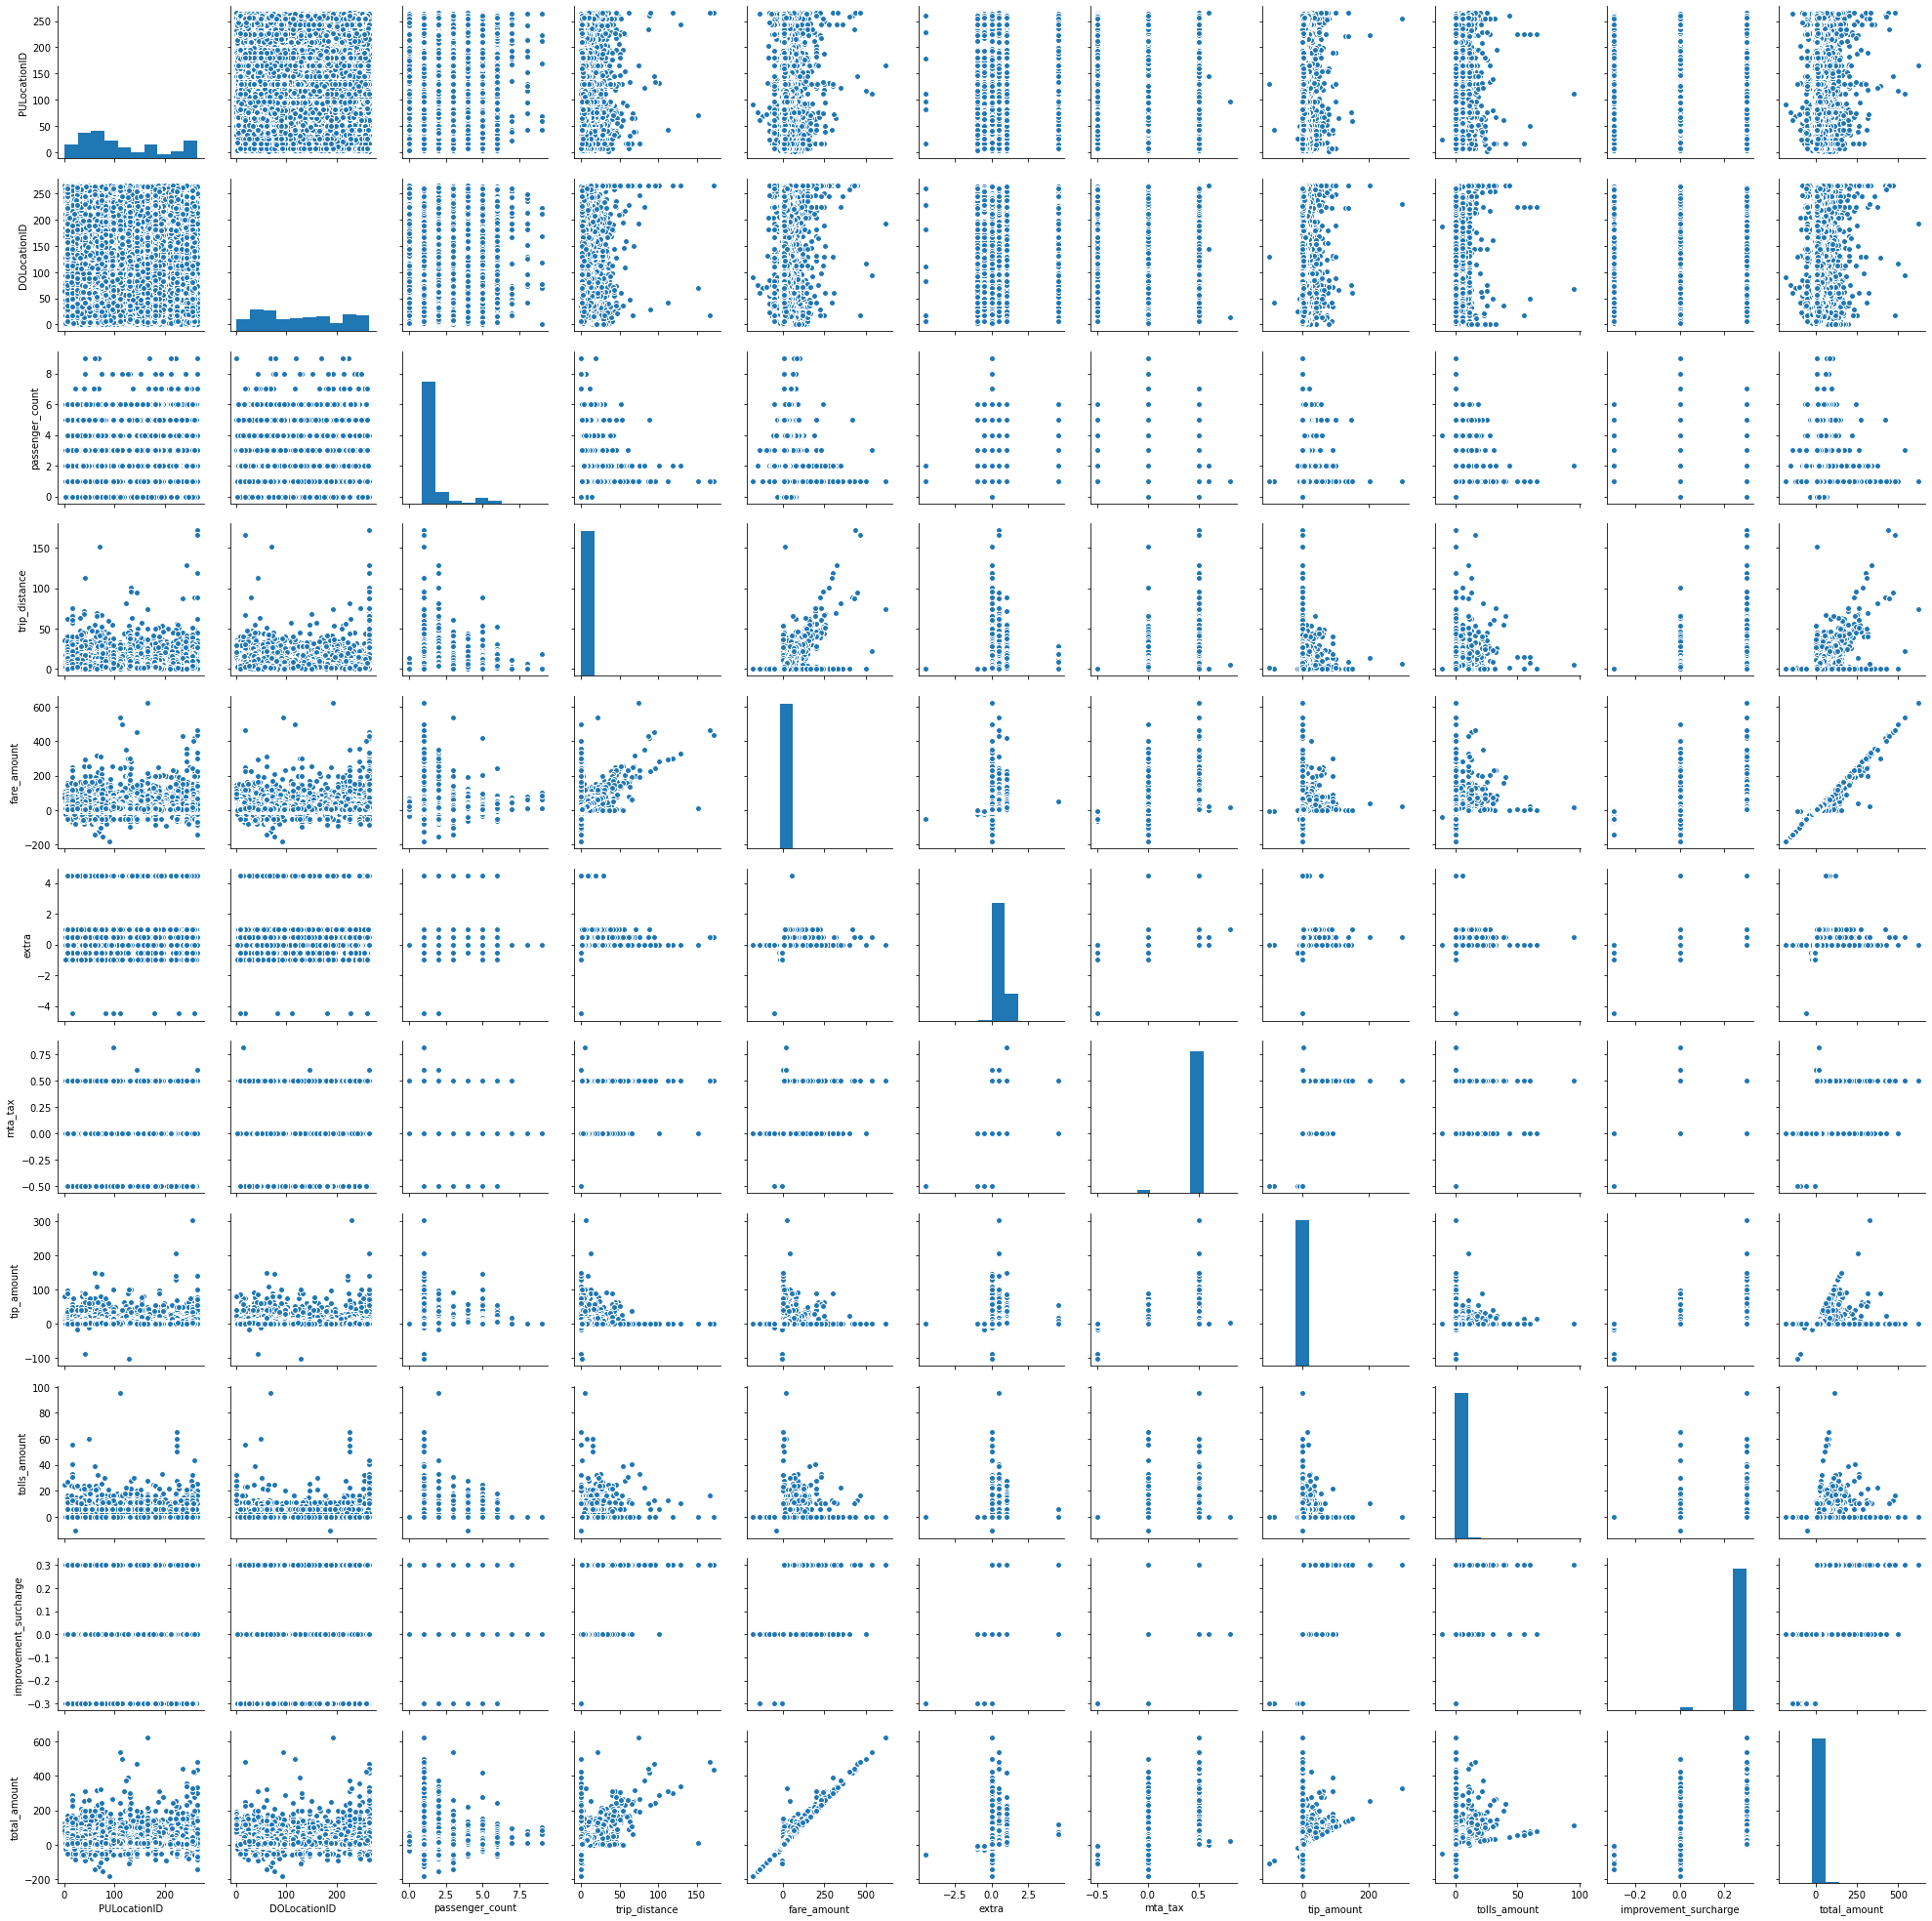

In [134]:
# Check the linear relationship between all numeric columns.
sns.pairplot(data=train_data.select_dtypes(['int64','float64']))

We can see total_amount is having good linear relationship with tip_amount.

## Data Preprocessing (Dummification,Imputaion,Checking Multi Colinearity)

In [26]:
# Split the data into train and validation with 70:30 ratio.
# train data for model bulding and validation data for evaluating model.
X_train,X_test,Y_train,Y_test = train_test_split(train_data.drop(['tip_amount'],axis=1),train_data['tip_amount'],test_size=0.3,random_state=np.random)

In [27]:
# Check the dimensions of the data.
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((737165, 22), (737165,), (315929, 22), (315929,))

In [777]:
# Check the first record of train data.
X_train.head(1)

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,pickup_timeofday,dropoff_timeofday,pickup_peak_hour,dropoff_peak_hour,pickup_peak_day,dropoff_peak_day
959087,1,N,1,41,116,1,5.61,7.5,1.0,0.5,...,9.3,2,1,6.7167,Evening,Evening,0,0,1,1


In [778]:
# Check the last record of validation data.
X_test.head(1)

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,total_amount,payment_type,trip_type,trip_duration,pickup_timeofday,dropoff_timeofday,pickup_peak_hour,dropoff_peak_hour,pickup_peak_day,dropoff_peak_day
742547,2,N,1,41,262,1,2.73,12.0,0.0,0.5,...,15.36,1,1,13.25,Evening,Evening,0,0,1,1


### Check Multi Colinearity

In [856]:
# Check multi colinearity between numeric varibles for train data.
X_train.select_dtypes(['int64','float64']).corr()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_duration
PULocationID,1.000000,0.148159,0.018845,0.002942,0.051699,0.029830,-0.043895,0.014372,-0.043831,0.054066,0.006291
DOLocationID,0.148159,1.000000,0.006461,0.003916,0.095129,-0.016887,-0.014801,0.017385,-0.017078,0.096182,0.007202
passenger_count,0.018845,0.006461,1.000000,0.001575,0.007249,0.012066,0.005836,0.003449,0.005722,0.008464,0.005856
trip_distance,0.002942,0.003916,0.001575,1.000000,-0.003739,0.031893,0.002685,-0.002175,0.003792,0.000707,-0.002749
fare_amount,0.051699,0.095129,0.007249,-0.003739,1.000000,-0.040713,-0.117157,0.295613,-0.098749,0.977887,0.092068
extra,0.029830,-0.016887,0.012066,0.031893,-0.040713,1.000000,0.104277,-0.018097,0.103784,0.004543,0.000413
mta_tax,-0.043895,-0.014801,0.005836,0.002685,-0.117157,0.104277,1.000000,-0.041227,0.966099,-0.088499,-0.009028
tolls_amount,0.014372,0.017385,0.003449,-0.002175,0.295613,-0.018097,-0.041227,1.000000,-0.008353,0.370814,0.021458
improvement_surcharge,-0.043831,-0.017078,0.005722,0.003792,-0.098749,0.103784,0.966099,-0.008353,1.000000,-0.068110,-0.008202
total_amount,0.054066,0.096182,0.008464,0.000707,0.977887,0.004543,-0.088499,0.370814,-0.068110,1.000000,0.086178


In [857]:
# Check multi colinearity between numeric varibles for validation varibales.
X_test.select_dtypes(['int64','float64']).corr()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_duration
PULocationID,1.000000,0.147532,0.020678,0.001005,0.049900,0.027365,-0.043493,0.016736,-0.042973,0.052618,0.004640
DOLocationID,0.147532,1.000000,0.005399,0.004089,0.096381,-0.016635,-0.016247,0.017592,-0.017799,0.096871,0.011160
passenger_count,0.020678,0.005399,1.000000,-0.000966,0.005177,0.012733,0.006791,0.002119,0.007041,0.006581,0.004747
trip_distance,0.001005,0.004089,-0.000966,1.000000,-0.005474,0.032205,-0.001229,-0.001819,0.000135,-0.000937,-0.004291
fare_amount,0.049900,0.096381,0.005177,-0.005474,1.000000,-0.037892,-0.116365,0.298880,-0.096050,0.975948,0.094637
extra,0.027365,-0.016635,0.012733,0.032205,-0.037892,1.000000,0.102058,-0.018927,0.102441,0.006587,-0.001186
mta_tax,-0.043493,-0.016247,0.006791,-0.001229,-0.116365,0.102058,1.000000,-0.047951,0.963322,-0.089170,-0.011527
tolls_amount,0.016736,0.017592,0.002119,-0.001819,0.298880,-0.018927,-0.047951,1.000000,-0.012230,0.374150,0.020658
improvement_surcharge,-0.042973,-0.017799,0.007041,0.000135,-0.096050,0.102441,0.963322,-0.012230,1.000000,-0.066308,-0.010838
total_amount,0.052618,0.096871,0.006581,-0.000937,0.975948,0.006587,-0.089170,0.374150,-0.066308,1.000000,0.088211


In [861]:
# Fucntion returns VIF values for each column.
def calculate_vif(df):
    vif=pd.DataFrame()
    vif['Columns']=df.select_dtypes(['int64','float64']).columns.values
    vif['Vif']=[variance_inflation_factor(df.select_dtypes(['int64','float64']).values,i) for i in range(df.select_dtypes(['int64','float64']).shape[1])]
    return vif

In [862]:
# Get the vif for train numeric columns.
calculate_vif(X_train)

,Columns,Vif
0,PULocationID,3.158300
1,DOLocationID,3.810696
2,passenger_count,2.663395
3,trip_distance,1.899914
4,fare_amount,77.314162
5,extra,2.013086
6,mta_tax,1094.040270
7,tolls_amount,1.365076
8,improvement_surcharge,1098.781061
9,total_amount,87.965548


In [863]:
# Get the vif for validation numeric columns.
calculate_vif(X_test)

,Columns,Vif
0,PULocationID,3.159957
1,DOLocationID,3.814956
2,passenger_count,2.659817
3,trip_distance,1.911035
4,fare_amount,68.287961
5,extra,2.002760
6,mta_tax,1043.841470
7,tolls_amount,1.349469
8,improvement_surcharge,1049.507699
9,total_amount,77.440361


Based on above results we can say mta_tax,improvement_surcharge are in muticolinearity,hence dropping improvement_surcharge column.

In [28]:
# Drop improvement_surcharge column from the given data.
def drop_improvement_surcharge(df):
    df.drop(['improvement_surcharge'],axis=1,inplace=True)

In [29]:
# Drop improvement_surcharge column from train data.
drop_improvement_surcharge(X_train)

In [30]:
# Drop improvement_surcharge column from validation data.
drop_improvement_surcharge(X_test)

### Dummification

In [31]:
# Function does one hot encoding for category columns.As we have all nominal data hence we can do one hot encoding for all of them.
def one_hot_encoding(df):
    df = pd.get_dummies(df,columns=['VendorID','store_and_fwd_flag','RatecodeID','payment_type','trip_type',
                                         'pickup_timeofday','dropoff_timeofday','pickup_peak_hour','dropoff_peak_hour',
                                         'pickup_peak_day','dropoff_peak_day'],drop_first=True)
    return df

In [32]:
# Do one hot encoding for category columns of train data.
X_train = one_hot_encoding(X_train)

In [33]:
# Do one hot encoding for category columns of validation data.
X_test = one_hot_encoding(X_test)

We have PULocationID,PULocationID columns which are nominal and having more number of unique values.
so we can do frequency count one hot encoding.i have opted this approaches beacuse top frequency locations have 
highest tip amount, so top pickup,dropoff location should get more weightage. 

In [34]:
# Function returns frequency count of pickup location.
def pickup_frequency_locationID():
    return train_data.PULocationID.value_counts().to_dict()

In [35]:
# Function returns frequency count of dropoff location.
def dropoff_frequency_locationID():
    return train_data.DOLocationID.value_counts().to_dict()

In [36]:
# Function does one hot encoding with frequency count for pickup,dropoff location columns.
def one_hot_encoding_frequencyCount(df):
    df.PULocationID = df.PULocationID.map(pickup_frequency_locationID())
    df.DOLocationID = df.DOLocationID.map(dropoff_frequency_locationID())

In [37]:
# Do one hot encoding for train data.
one_hot_encoding_frequencyCount(X_train)

In [38]:
# Do one hot encoding for validation data.
one_hot_encoding_frequencyCount(X_test)

### NA Imputation

In [879]:
# Check whether train have any null values after perfoming dummification.
X_train.isna().sum()

PULocationID                    0
DOLocationID                    0
passenger_count                 0
trip_distance                   0
fare_amount                     0
extra                           0
mta_tax                         0
tolls_amount                    0
total_amount                    0
trip_duration                   0
VendorID_2                      0
store_and_fwd_flag_Y            0
RatecodeID_2                    0
RatecodeID_3                    0
RatecodeID_4                    0
RatecodeID_5                    0
RatecodeID_6                    0
payment_type_2                  0
payment_type_3                  0
payment_type_4                  0
payment_type_5                  0
trip_type_2                     0
pickup_timeofday_Evening        0
pickup_timeofday_Late night     0
pickup_timeofday_Morning        0
dropoff_timeofday_Evening       0
dropoff_timeofday_Late night    0
dropoff_timeofday_Morning       0
pickup_peak_hour_1              0
dropoff_peak_h

In [880]:
# Check whether validation have any null values after perfoming dummification.
X_test.isna().sum()

PULocationID                    0
DOLocationID                    0
passenger_count                 0
trip_distance                   0
fare_amount                     0
extra                           0
mta_tax                         0
tolls_amount                    0
total_amount                    0
trip_duration                   0
VendorID_2                      0
store_and_fwd_flag_Y            0
RatecodeID_2                    0
RatecodeID_3                    0
RatecodeID_4                    0
RatecodeID_5                    0
RatecodeID_6                    0
payment_type_2                  0
payment_type_3                  0
payment_type_4                  0
payment_type_5                  0
trip_type_2                     0
pickup_timeofday_Evening        0
pickup_timeofday_Late night     0
pickup_timeofday_Morning        0
dropoff_timeofday_Evening       0
dropoff_timeofday_Late night    0
dropoff_timeofday_Morning       0
pickup_peak_hour_1              0
dropoff_peak_h

We don't have any null values hence we need not to perform NA imputation

## Model Building ( Different Linear Models )

### Stats Linear Model

In [883]:
# Build stats linear model.
st_lm = OLS(Y_train,X_train).fit()

In [884]:
# Get model summary.
st_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tip_amount   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.332e+06
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:01:25   Log-Likelihood:            -1.3592e+05
No. Observations:              737165   AIC:                         2.719e+05
Df Residuals:                  737133   BIC:                         2.723e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
PULocationID                  1.282e-06   1.85e-08     69.378      0.000    1.25e-06    1.32e-06
DOLocationID                 -5.849e-07   3.51e-08    -16.664      0.000   -6.54e-07   -5.16e-07
passenger_count                 -0.0003      0.000     -0.985      0.325      -0.001       0.000
trip_distance                    0.0006      0.000      4.479      0.000       0.000       0.001
fare_amount                     -0.9495      0.000  -3618.164      0.000      -0.950      -0.949
extra                           -0.9393      0.001   -631.943      0.000      -0.942      -0.936
mta_tax                         -1.4693      0.003   -444.954      0.000      -1.476      -1.463
tolls_amount                    -0.9451      0.001  -1677.931      0.000      -0.946      -0.944
total_amount                     0.9506      0.000   3986.271      0.000       0.950       0.951
trip_duration                 1.905e-08   3.38e-06      0.006      0.996   -6.61e-06    6.65e-06
VendorID_2                      -0.0525      0.001    -61.040      0.000      -0.054      -0.051
store_and_fwd_flag_Y             0.0029      0.009      0.334      0.739      -0.014       0.020
RatecodeID_2                     0.1120      0.009     12.727      0.000       0.095       0.129
RatecodeID_3                    -0.1148      0.017     -6.804      0.000      -0.148      -0.082
RatecodeID_4                     0.0139      0.015      0.908      0.364      -0.016       0.044
RatecodeID_5                     0.0356      0.011      3.297      0.001       0.014       0.057
RatecodeID_6                     0.0287      0.110      0.261      0.794      -0.187       0.244
payment_type_2                  -0.0369      0.001    -42.902      0.000      -0.039      -0.035
payment_type_3                  -0.0724      0.006    -11.242      0.000      -0.085      -0.060
payment_type_4                  -0.0690      0.008     -8.480      0.000      -0.085      -0.053
payment_type_5                  -0.0652      0.061     -1.074      0.283      -0.184       0.054
trip_type_2                      0.0331      0.011      3.080      0.002       0.012       0.054
pickup_timeofday_Evening         0.0054      0.003      1.790      0.073      -0.001       0.011
pickup_timeofday_Late night      0.0071      0.004      1.748      0.080      -0.001       0.015
pickup_timeofday_Morning         0.0015      0.004      0.441      0.659      -0.005       0.008
dropoff_timeofday_Evening     2.888e-05      0.003      0.010      0.992      -0.006       0.006
dropoff_timeofday_Late night     0.0083      0.004      2.080      0.038       0.000       0.016
dropoff_timeofday_Morning       -0.0074      0.004     -2.036      0.042      -0.014      -0.000
pickup_peak_hour_1              -0.0349      0.001    -24.599      0.000    

We can observe R^2 and adjust R^2 are very high and when we see some of the features doesn't fall in significant region <0.05 .
We can exclude those features and build a model and include those and build a model,if we don't see any differene in metric then
we can drop those features.

In [888]:
# Get the predictions on train data.
train_prediction = st_lm.predict(X_train)

In [899]:
# Get the predictions for validation data.
validation_predictions = st_lm.predict(X_test)

In [889]:
# Calculate Residuals.
residuals = Y_train.values-train_prediction

#### Verify linear regression assumptions

Before bulding model we have verified features have linear relationship with target and independent values doesn't have multi colinearity.
Now we will verify below assumptions.

1) Residual should follow Normal distribution.

2) Residual mean should be zero or close to zero.

3) Residual follows homoschedacity(constant variance).

4) Residual should scatter randomly.

(array([1.20000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.55000e+02, 4.21000e+02, 0.00000e+00, 1.80000e+02, 1.35950e+04,
        4.64000e+02, 7.21456e+05, 5.79000e+02, 5.50000e+01, 3.00000e+01,
        9.00000e+00, 5.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-9.51567019, -8.66874397, -7.82181775, -6.97489153, -6.12796531,
        -5.28103909, -4.43411287, -3.58718664, -2.74026042, -1.8933342 ,
        -1.04640798, -0.19948176,  0.64744446,  1.49437068,  2.3412969 ,
         3.18822312,  4.03514934,  4.88207556,  5.72900178,  6.57592801,
         7.42285423]),
 <a list of 20 Patch objects>)

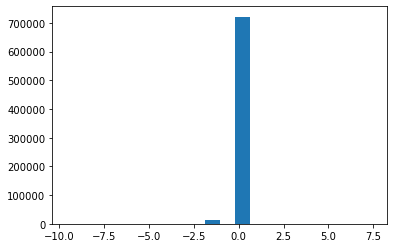

In [894]:
# 1) Residual should follows normal distribution.
plt.hist(residuals,bins=20)

(array([7.28766e+05, 7.59600e+03, 6.11000e+02, 6.60000e+01, 4.50000e+01,
        2.20000e+01, 2.60000e+01, 7.00000e+00, 9.00000e+00, 2.00000e+00,
        6.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  0. ,   7.5,  15. ,  22.5,  30. ,  37.5,  45. ,  52.5,  60. ,
         67.5,  75. ,  82.5,  90. ,  97.5, 105. , 112.5, 120. , 127.5,
        135. , 142.5, 150. ]),
 <a list of 20 Patch objects>)

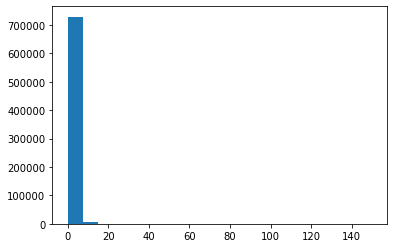

In [893]:
# Check the distribution of target variable.
plt.hist(Y_train,bins=20)

In [895]:
# 2) Redisual mean should be zero(We can see residual mean is very close to zero).
print(np.mean(residuals))

-3.818961780161602e-05


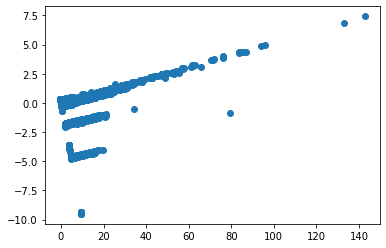

In [896]:
# 3)Residual should have constant variance(We can see most of the residual variance is constant).
plt.scatter(x=train_prediction,y=residuals)

Text(0, 0.5, 'Residuals')

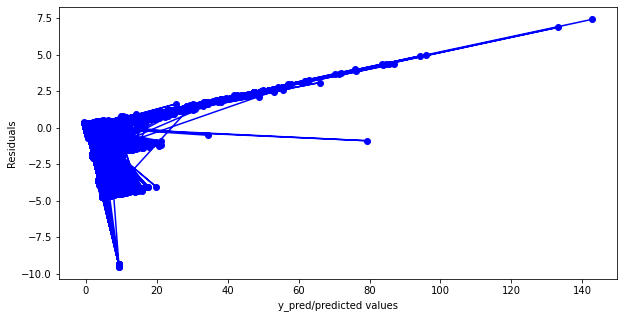

In [897]:
# 4) Residuals should scatter randomly(There are no patterns in residuals).
plt.figure(figsize=(10,5))
plt.plot(train_prediction,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

In [898]:
# Calculate the RMSE for train data.
print(sqrt(mean_squared_error(Y_train,train_prediction)))

0.2909643580511511


In [901]:
# Calculate the RMSE for validation data.
print(sqrt(mean_squared_error(Y_test,validation_predictions)))

0.2888704449124584


We can observe train and validation error is very close,this indicates model is having consistancy.

### Decision Tree Regressor

In [902]:
# Instantiate Decision tree model.
dr_model = DecisionTreeRegressor()

In [903]:
# Fit a model.
dr_model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [904]:
# Get the predictions for train data.
train_prediction = dr_model.predict(X_train)

In [905]:
# Get the prediction for validation data.
validation_predictions = dr_model.predict(X_test)

In [908]:
# Get the R^2 for train data.
r2_score(Y_train,train_prediction)

0.999999999926828

In [909]:
# Get the R^2 for validation data.
r2_score(Y_test,validation_predictions)

0.9063611317871639

In [906]:
# Display RMSE value for train data.
print(sqrt(mean_squared_error(Y_train,train_prediction)))

1.646630299057267e-05


In [907]:
# Display RMSE value for validation data.
print(sqrt(mean_squared_error(Y_test,validation_predictions)))

0.6301844455811654


If you observe diffeence between train,validation RMSE,R^2,it is very high,that means model is overfitting,we can apply pruning technique to control the overfitting.

### Random Forest Regressor

In [911]:
# Instantiate random forest model.
rfr_model = RandomForestRegressor()

In [912]:
# Fit a model.
rfr_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [913]:
# Get the predictions for train data.
train_prediction = rfr_model.predict(X_train)

In [914]:
# Get the prediction for validation data.
validation_predictions = rfr_model.predict(X_test)

In [915]:
# Get the R^2 for train data.
r2_score(Y_train,train_prediction)

0.9975731389275271

In [916]:
# Get the R^2 for validation data.
r2_score(Y_test,validation_predictions)

0.9283978991503036

In [917]:
# Display RMSE value for train data.
print(sqrt(mean_squared_error(Y_train,train_prediction)))

0.09483002944518129


In [918]:
# Display RMSE value for validation data.
print(sqrt(mean_squared_error(Y_test,validation_predictions)))

0.5510645631672227


If you observe diffeence between train,validation RMSE,R^2,it is very high,that means model is overfitting,we can tune different parameters to contol the overfitting.
We can also get feature importance for all columns,based on some threshold value we may remove some features.

### XGBoost Regressor

In [39]:
## Instantiate XGB model.
xgb_model = XGBRegressor(n_jobs=-1)

In [40]:
# Fit a model.
xgb_model.fit(X_train,Y_train)

[22:21:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [41]:
# Get the predictions for train data.
train_prediction = xgb_model.predict(X_train)

In [42]:
# Get the prediction for validation data.
validation_predictions = xgb_model.predict(X_test)

In [46]:
# Get the R^2 for train data.
r2_score(Y_train,train_prediction)

0.8593246600176556

In [47]:
# Get the R^2 for validation data.
r2_score(Y_test,validation_predictions)

0.8548018815016936

In [48]:
# Display RMSE value for train data.
print(sqrt(mean_squared_error(Y_train,train_prediction)))

0.728734659377865


In [49]:
# Display RMSE value for validation data.
print(sqrt(mean_squared_error(Y_test,validation_predictions)))

0.7695756211566306


We can observe XGB is showing consistancy even though R^2 is less comapre to other models.

Let's focus on parameter tuninng for XGBR.

### Parameter tuning using Randomized search.

In [69]:
# Prepare parameter dictionary.
param_grid = {
    'n_estimators' : [50,100,150,200,250,300],
    'max_depth':[5,8,10,12,15,18],
    'learning_rate':[0.05,0.1,0.2,0.25,0.3,0.4]
}

In [70]:
# Initialize randomized search.
rd_model = RandomizedSearchCV(estimator=xgb_model,param_distributions=param_grid,cv=10,n_jobs=-1)

In [71]:
# Fit a model.
%time rd_model.fit(X_train,Y_train)

KeyboardInterrupt: 

In [ ]:
# Get the best estimators.
rd_model.best_estimator_

In [ ]:
# Get the best parameters.
rd_model.best_params_

In [ ]:
# Get the best score.
rd_model.best_score_

I have tried multiple times to run randomized search but everytime my  machine went into unreachable state.
Based on randomized search result we can opt best parameters for bulding model so that error would be very less.

### Test Data

Test Data need to go through all the preprocess steps.

In [50]:
# Load the test data.
test_data = pd.read_csv('green_tripdata_2017-02.csv',sep=',',header='infer')

In [52]:
# Drop ehail_fee column from test data.
dropNAColumn(test_data)

In [53]:
# Convert date type for test data.
dateDataTypeConversion(test_data)

In [54]:
# Get the trip duration for test data.
tripDuration(test_data)

In [55]:
# Remove zero,negitve records from fare_amount,total_amount,trip_distance,passenger_count
test_data = remove_zero_negative_records(test_data)

In [56]:
# Get the pickup,dropping day,hour for test data.
dateFeatures(test_data)

In [57]:
# Get the hour category for pickup,dropoff hour for test data.
hour_of_day(test_data)

In [58]:
# Get the peak hour indicator.
peakHour(test_data)

In [59]:
# Get the peak day.
peakDay(test_data)

In [60]:
# Separate features and target columns.
test_target = test_data['tip_amount']
test_data.drop(['tip_amount'],axis=1,inplace=True)

In [61]:
# Convert category column data types for test data.
catDataTypeConversions(test_data)

In [62]:
# Drop improvement_surcharge column from test data.
drop_improvement_surcharge(test_data)

In [63]:
# Do one hot encoding for category columns of test data.
test_data = one_hot_encoding(test_data)

In [64]:
# Do one hot encoding for test data.
one_hot_encoding_frequencyCount(test_data)

In [65]:
# Get the predictions for test data.
test_prediction = xgb_model.predict(test_data)

In [67]:
# Get the R^2 for test data.
r2_score(test_target,test_prediction)

0.8051418337199221

In [68]:
# Display RMSE value for test data.
print(sqrt(mean_squared_error(test_target,test_prediction)))

0.9619685867174856


We can observe train and test data RMSE values are very near and error is close to Zero.Hence model is having good performance and consistency.